# 가설 1번 분석

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [79]:
articles = pd.read_csv('h-and-m-personalized-fashion-recommendations/articles.csv')
transactions = pd.read_csv('h-and-m-personalized-fashion-recommendations/transactions_train.csv')

In [80]:
transaction_df = transactions[['article_id', 't_dat', 'price']]
article_df = articles[['article_id', 'product_group_name', 'garment_group_name', 'detail_desc']]

In [81]:
transaction_df['year'] = pd.to_datetime(transaction_df['t_dat']).dt.year

/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_5618/1019639135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_df['year'] = pd.to_datetime(transaction_df['t_dat']).dt.year


In [82]:
del transaction_df['t_dat']

In [83]:
merged_df = pd.merge(transaction_df, article_df, on='article_id', how='inner')

In [84]:
merged_df = merged_df.fillna('')

In [85]:
merged_df_groupby = merged_df.groupby(['year', 'article_id']).agg({'price': 'sum'})
merged_df_groupby

price
year article_id           
2018 108775015   40.780186
     108775044   15.354525
     108775051    1.053729
     110065001   11.055780
     110065002    4.965797
...                    ...
2020 952267001    0.614254
     952938001    0.432051
     953450001    0.286220
     953763001    0.766780
     956217002    1.242186

[174131 rows x 1 columns]

In [86]:
del merged_df['year']
del merged_df['price']

In [87]:
merged_df_groupby = merged_df_groupby.reset_index()
merged_df_groupby_year = pd.merge(merged_df_groupby, merged_df, on='article_id', how='inner')

In [88]:
del merged_df_groupby_year['detail_desc']

In [89]:
merged_df_groupby_year.head()

,year,article_id,price,product_group_name,garment_group_name
0,2018,108775015,40.780186,Garment Upper body,Jersey Basic
1,2018,108775015,40.780186,Garment Upper body,Jersey Basic
2,2018,108775015,40.780186,Garment Upper body,Jersey Basic
3,2018,108775015,40.780186,Garment Upper body,Jersey Basic
4,2018,108775015,40.780186,Garment Upper body,Jersey Basic


연도별 영역 나눠서 시각화 진행

In [90]:
merged_df_groupby_2018

,article_id,product_type_name,year,price
1663,399223001,Trousers,2018,4.724044e+06
11253,562245001,Trousers,2018,3.723936e+06
40060,706016001,Trousers,2018,3.672505e+06
12734,568601006,Blazer,2018,3.447008e+06
40061,706016002,Trousers,2018,2.177330e+06
...,...,...,...,...
5553,512568001,Vest top,2018,8.474576e-04
14380,577444002,Hair string,2018,8.474576e-04
3795,491680015,T-shirt,2018,8.474576e-04
1811,407663007,Earring,2018,6.779661e-04


In [91]:
# year에 있는 연도로 필터링 후, article_id로 묶고 price는 sum
merged_df_groupby_2018 = merged_df_groupby_year[merged_df_groupby_year['year'] == 2018]
merged_df_groupby_2019 = merged_df_groupby_year[merged_df_groupby_year['year'] == 2019]
merged_df_groupby_2020 = merged_df_groupby_year[merged_df_groupby_year['year'] == 2020]

In [92]:
merged_df_groupby_2018 = merged_df_groupby_2018.groupby(['article_id', 'garment_group_name', 'year']).agg({'price':'sum'}).reset_index()
merged_df_groupby_2018.sort_values(by='price', ascending=False, inplace=True)

In [93]:
merged_df_groupby_2019 = merged_df_groupby_2019.groupby(['article_id', 'garment_group_name', 'year']).agg({'price':'sum'}).reset_index()
merged_df_groupby_2019.sort_values(by='price', ascending=False, inplace=True)
merged_df_groupby_2020 = merged_df_groupby_2020.groupby(['article_id', 'garment_group_name', 'year']).agg({'price':'sum'}).reset_index()
merged_df_groupby_2020.sort_values(by='price', ascending=False, inplace=True)

In [117]:
merged_df_groupby_2018 = merged_df_groupby_2018.groupby(['garment_group_name', 'year']).agg({'price': 'sum'}).reset_index()
merged_df_groupby_2019 = merged_df_groupby_2019.groupby(['garment_group_name', 'year']).agg({'price': 'sum'}).reset_index()
merged_df_groupby_2020 = merged_df_groupby_2020.groupby(['garment_group_name', 'year']).agg({'price': 'sum'}).reset_index()

In [118]:
merged_df_groupby_2018.sort_values(by='price', ascending=False, inplace=True)
merged_df_groupby_2019.sort_values(by='price', ascending=False, inplace=True)
merged_df_groupby_2020.sort_values(by='price', ascending=False, inplace=True)

In [94]:
trends = pd.read_excel('h-and-m-personalized-fashion-recommendations/trend_keyword.xlsx')
del trends['Unnamed: 0']

In [95]:
trends['count'] = 1

In [96]:
trend_2018 = trends[trends['date'] == 2018]
trend_2019 = trends[trends['date'] == 2019]
trend_2020 = trends[trends['date'] == 2020]

In [97]:
trend_2018 = trend_2018.groupby(['keyword'])['count'].sum().reset_index()
trend_2019 = trend_2019.groupby(['keyword'])['count'].sum().reset_index()
trend_2020 = trend_2020.groupby(['keyword'])['count'].sum().reset_index()

### subplot으로 그리기

In [98]:
# 순서대로 merged_df_groupby_2018(막대), merged_df_groupby_2018(wordcloud), trend_2018
from wordcloud import WordCloud

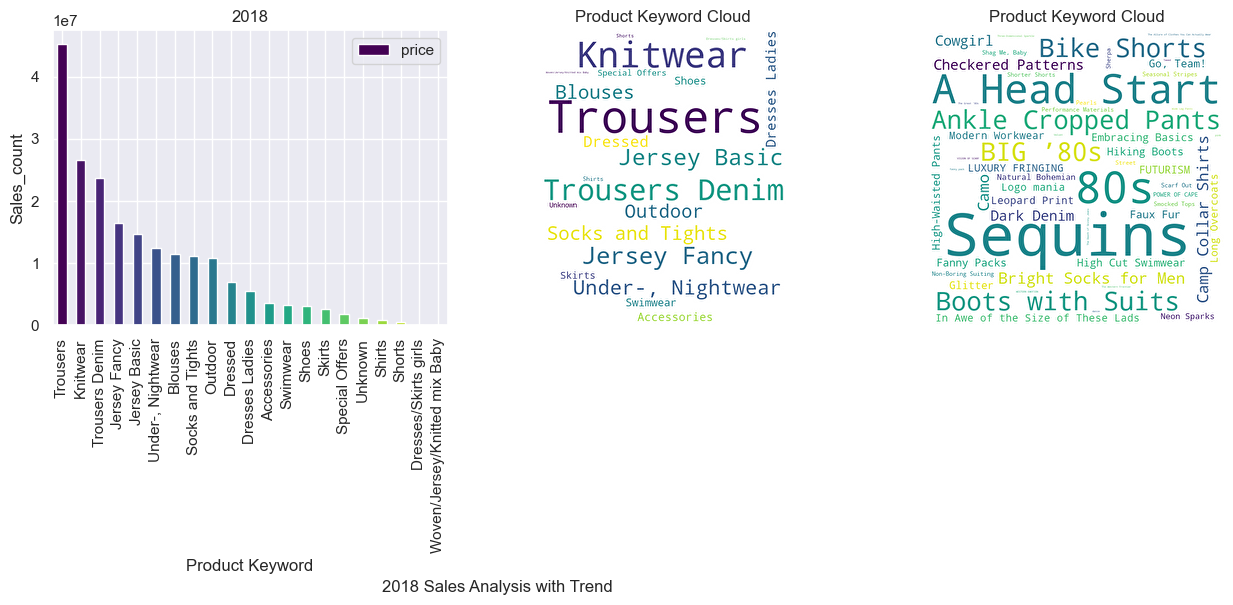

In [132]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))
# bar
head_2018 = merged_df_groupby_2018
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(head_2018)))

head_2018.plot(kind='bar', x='garment_group_name', y='price', color=colors, ax=axes[0])
axes[0].set_title('2018')
axes[0].set_xlabel('Product Keyword')
axes[0].set_ylabel('Sales_count')
axes[0].tick_params(axis='y', rotation = 0)

# wordcloud - product
sum_product_group = merged_df_groupby_2018.groupby('garment_group_name')['price'].sum()
word_freq1 = sum_product_group.to_dict()
wordcloud1 = WordCloud(width=500, height=600, background_color='white', colormap='viridis').generate_from_frequencies(word_freq1)

axes[1].imshow(wordcloud1, interpolation='sinc')
axes[1].axis('off')
axes[1].set_title('Product Keyword Cloud')

# wordcloud - trend keyword
sum_trend_group = trend_2018.groupby('keyword')['count'].sum()
word_freq2 = sum_trend_group.to_dict()
wordcloud2 = WordCloud(width=600, height=600, background_color='white', colormap='viridis', margin=10).generate_from_frequencies(word_freq2)

axes[2].imshow(wordcloud2, interpolation='sinc')
axes[2].axis('off')
axes[2].set_title('Product Keyword Cloud')

fig.text(0.3, 0, '2018 Sales Analysis with Trend')
plt.tight_layout()
plt.show()

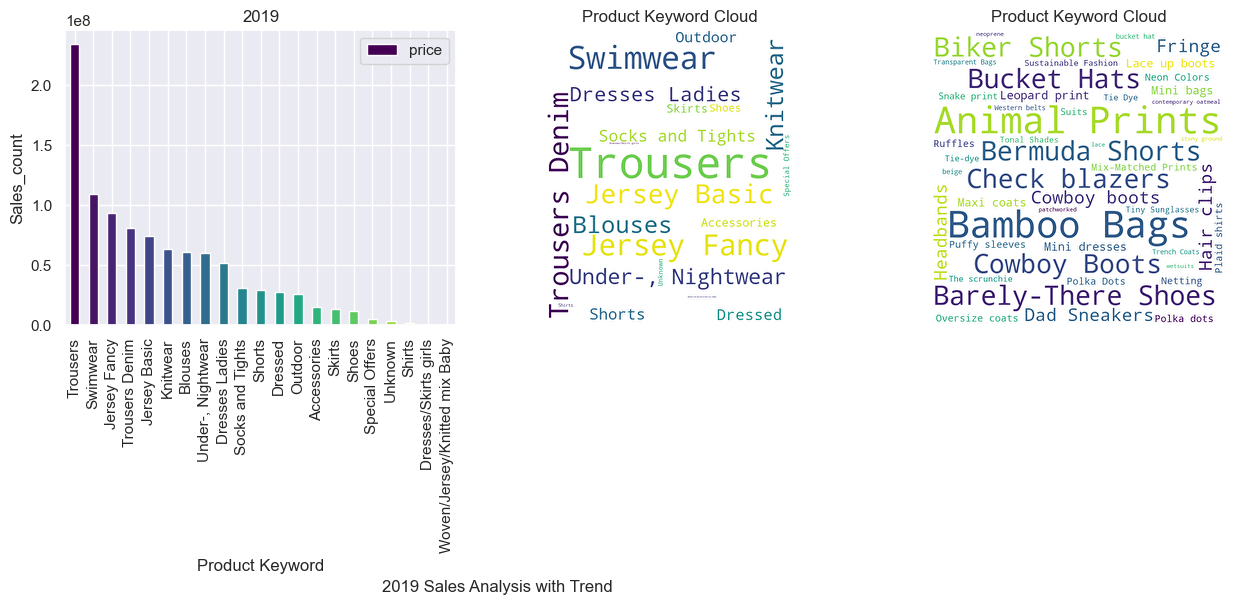

In [133]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))
# bar
head_2019 = merged_df_groupby_2019
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(head_2019)))

head_2019.plot(kind='bar', x='garment_group_name', y='price', color=colors, ax=axes[0])
axes[0].set_title('2019')
axes[0].set_xlabel('Product Keyword')
axes[0].set_ylabel('Sales_count')
axes[0].tick_params(axis='y', rotation = 0)

# wordcloud - product
sum_product_group = merged_df_groupby_2019.groupby('garment_group_name')['price'].sum()
word_freq1 = sum_product_group.to_dict()
wordcloud1 = WordCloud(width=500, height=600, background_color='white', colormap='viridis').generate_from_frequencies(word_freq1)

axes[1].imshow(wordcloud1, interpolation='sinc')
axes[1].axis('off')
axes[1].set_title('Product Keyword Cloud')

# wordcloud - trend keyword
sum_trend_group = trend_2019.groupby('keyword')['count'].sum()
word_freq2 = sum_trend_group.to_dict()
wordcloud2 = WordCloud(width=600, height=600, background_color='white', colormap='viridis', margin=10).generate_from_frequencies(word_freq2)

axes[2].imshow(wordcloud2, interpolation='sinc')
axes[2].axis('off')
axes[2].set_title('Product Keyword Cloud')

fig.text(0.3, 0, '2019 Sales Analysis with Trend')
plt.tight_layout()
plt.show()

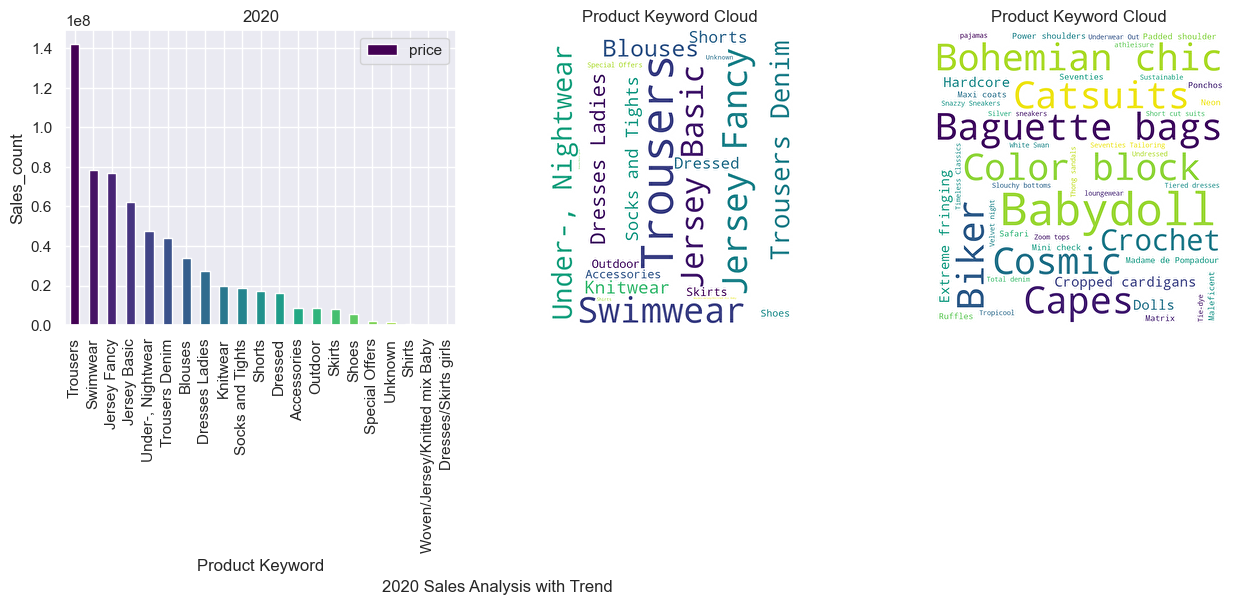

In [134]:
# 서브플롯 생성
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))
# bar
head_2020 = merged_df_groupby_2020
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(head_2020)))

head_2020.plot(kind='bar', x='garment_group_name', y='price', color=colors, ax=axes[0])
axes[0].set_title('2020')
axes[0].set_xlabel('Product Keyword')
axes[0].set_ylabel('Sales_count')
axes[0].tick_params(axis='y', rotation = 0)

# wordcloud - product
sum_product_group = merged_df_groupby_2020.groupby('garment_group_name')['price'].sum()
word_freq1 = sum_product_group.to_dict()
wordcloud1 = WordCloud(width=500, height=600, background_color='white', colormap='viridis').generate_from_frequencies(word_freq1)

axes[1].imshow(wordcloud1, interpolation='sinc')
axes[1].axis('off')
axes[1].set_title('Product Keyword Cloud')

# wordcloud - trend keyword
sum_trend_group = trend_2020.groupby('keyword')['count'].sum()
word_freq2 = sum_trend_group.to_dict()
wordcloud2 = WordCloud(width=600, height=600, background_color='white', colormap='viridis', margin=10).generate_from_frequencies(word_freq2)

axes[2].imshow(wordcloud2, interpolation='sinc')
axes[2].axis('off')
axes[2].set_title('Product Keyword Cloud')

fig.text(0.3, 0, '2020 Sales Analysis with Trend')
plt.tight_layout()
plt.show()

# 가설 2번 분석

### 주 타겟층 설정
- 나이대별로 어떤 나이대의 사람이 가장 많이 샀는지 파악 / 온라인 1개, 오프라인 1개
- 가장 많이 산 나이대를 주 타겟층으로 잡고, 해당 나이대에서 주로 구매한 품목 종류를 파악
- 사용할 수 있는 컬럼 : age(나이), department(남성복, 여성복 등) <- 이건 좀 크려나
- PlanA : age(나이)
- PlanB : department(남성복, 여성복 등)
- PlanC : 둘 다 사용

### 필요한 컬럼 정보
- Transactions : price, sales_channel_id, customer_id, article_id
- Customers : customer_id, age
- Articles : article_id, department_name
- 연결 : customer_id, article_id

나이대별로 판매 추이 분석
- age, price, article_id, sales_channel_id

In [7]:
transaction_df = transactions[['sales_channel_id', 'price', 'customer_id']]
customer_df = customers[['customer_id', 'age']]

In [14]:
customer_df.head()

,customer_id,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0


In [30]:
merge_df_tc = pd.merge(transaction_df, customer_df, on='customer_id', how='left')
# merge_df_tc['age'] = merge_df_tc['age'].astype(int)

In [51]:
# age가 명시되지 않은 row가 생각보다 많음 / 24217446개 대비 "7570878개"
# NULL 값에 대한 처리가 필요 -> 순위에 큰 변동이 없어 데이터 처리가 원활하도록 drop 시키기로 결정
merge_df_tc_drop = merge_df_tc.dropna()
merge_df_tc_drop.value_counts()

sales_channel_id  price     customer_id                                                       age 
2                 0.033881  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b  31.0    261
                  0.025407  49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f  28.0    261
                  0.033881  8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076  60.0    252
                  0.025407  67931690bdf18d2e328854ae772cd5ce2505fdc11164693998b13e706db0bb56  55.0    212
                            be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b  31.0    201
                                                                                                     ... 
                  0.004068  ada09167216f6ab21ebf0a2b50599ff450b25d95a1b113a90ff11de1af42226a  23.0      1
                            ab48ce8237390838fdab5e2054177749a91d809f37193a816c3f951b58b3bde4  56.0      1
                            a8cf869d9b5ab64d5d7f52752

age 대략적인 분포 / 결측치 처리 방식에 따라
### dropna
- 0-20      12515.349932
- 21-30    271432.015305
- 31-40    137975.599508
- 41-50    103708.953712
- 51-60    115598.313627
- 61-70     27739.443661
- 71-80      4907.879627
### ffill
- 0-20      18834.831763
- 21-30    363738.608915
- 31-40    163996.822000
- 41-50    159387.910136
- 51-60    136586.667034
- 61-70     36488.659153
- 71-80      5185.190847
### bfill
- 0-20      19526.610610
- 21-30    341127.094475
- 31-40    164687.496000
- 41-50    170272.963356
- 51-60    148456.974373
- 61-70     33309.291932
- 71-80      6573.293492

연령대별로 나눠 그룹화

In [52]:
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
merge_df_tc_drop['age'] = pd.cut(merge_df_tc_drop['age'], bins=bins, labels=labels, right=False)
merge_df_tc_drop.value_counts()

/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_17487/158844881.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df_tc_drop['age'] = pd.cut(merge_df_tc_drop['age'], bins=bins, labels=labels, right=False)


sales_channel_id  price     customer_id                                                       age  
2                 0.033881  be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b  31-40    261
                  0.025407  49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f  21-30    261
                  0.033881  8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076  61-70    252
                  0.025407  67931690bdf18d2e328854ae772cd5ce2505fdc11164693998b13e706db0bb56  51-60    212
                            be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b  31-40    201
                                                                                                      ... 
1                 0.025407  1585db3f399371f00af5e81a6b9558494af9d2716a660df4239395ab5fe03846  41-50      1
                            158621c07ef366204b2af17e53f5ed76e61e3ebba8724c1a2f1a69f30a1e0606  51-60      1
                            158655b854d3e8e0

In [53]:
merge_df_tc_channel = merge_df_tc_drop.groupby(['sales_channel_id', 'age'])['price'].sum().reset_index()
merge_df_tc_offline = merge_df_tc_channel[merge_df_tc_channel['sales_channel_id'] == 1]
merge_df_tc_online = merge_df_tc_channel[merge_df_tc_channel['sales_channel_id'] == 2]

/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_17487/1868131217.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merge_df_tc_channel = merge_df_tc_drop.groupby(['sales_channel_id', 'age'])['price'].sum().reset_index()


- Online

In [54]:
merge_df_tc_online = merge_df_tc_online.groupby('age')['price'].sum().reset_index()
merge_df_tc_online

/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_17487/2259096788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merge_df_tc_online = merge_df_tc_online.groupby('age')['price'].sum().reset_index()


,age,price
0,0-20,8070.882729
1,21-30,206049.861576
2,31-40,111349.029559
3,41-50,76305.334644
4,51-60,84733.788407
5,61-70,20130.203339
6,71-80,3436.167441


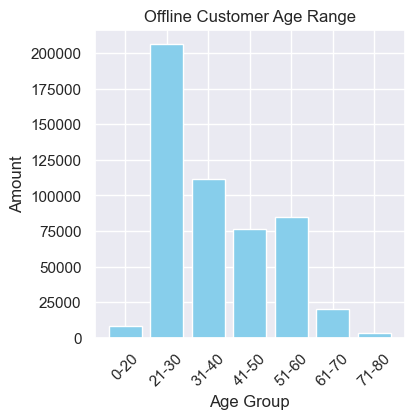

In [60]:
plt.figure(figsize=(4, 4))
plt.bar(merge_df_tc_online['age'], merge_df_tc_online['price'], color='skyblue')

plt.title('Offline Customer Age Range')
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

- Offline

In [55]:
merge_df_tc_offline = merge_df_tc_offline.groupby('age')['price'].sum().reset_index()
merge_df_tc_offline

/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_17487/2061163152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merge_df_tc_offline = merge_df_tc_offline.groupby('age')['price'].sum().reset_index()


,age,price
0,0-20,4444.467203
1,21-30,65382.153729
2,31-40,26626.569949
3,41-50,27403.619068
4,51-60,30864.525220
5,61-70,7609.240322
6,71-80,1471.712186


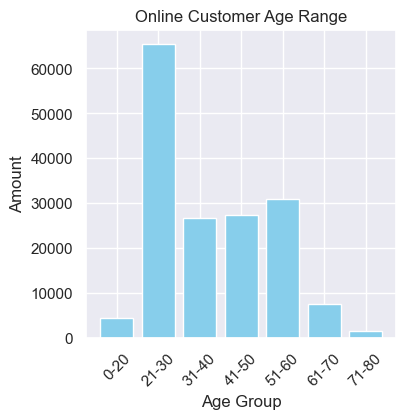

In [61]:
plt.figure(figsize=(4, 4))
plt.bar(merge_df_tc_online['age'], merge_df_tc_offline['price'], color='skyblue')

plt.title('Online Customer Age Range')
plt.xlabel('Age Group')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

- 20대의 구매가 online, offline 모두 많음
    - 그 외 고려사항을 위해 20대를 제외하고 생각
    - Offline : 30대 > 50대 > 40대
    - Online : 50대 > 40대 > 30대
    - Offline의 경우 직접 외출을 해서 가야되는 부담이 있다보니 나이가 많을수록 Online을 선호하지 않을까 생각 + 60대 이상은 Online 사용 빈도가 적어 구매율도 적을 듯

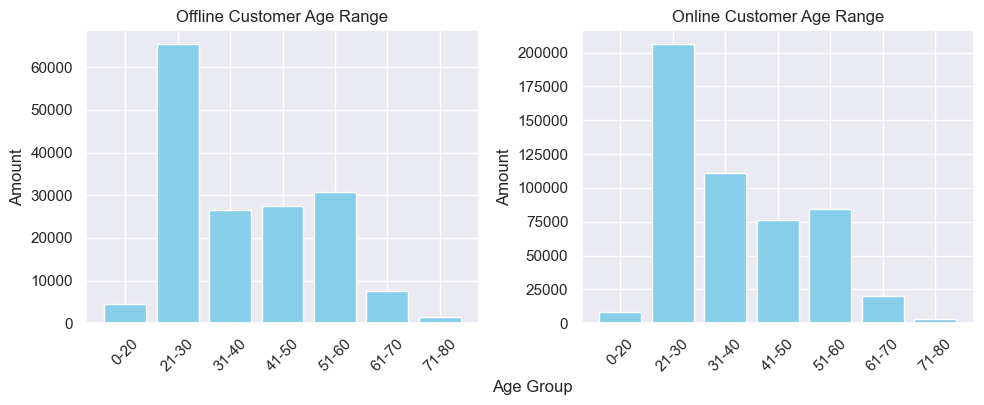

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Offline
axes[0].bar(merge_df_tc_offline['age'], merge_df_tc_offline['price'], color='skyblue')
axes[0].set_title('Offline Customer Age Range')
axes[0].set_ylabel('Amount')
axes[0].tick_params(axis='x', rotation=45)
# Online
axes[1].bar(merge_df_tc_online['age'], merge_df_tc_online['price'], color='skyblue')
axes[1].set_title('Online Customer Age Range')
axes[1].set_ylabel('Amount')
axes[1].tick_params(axis='x', rotation=45)

fig.text(0.5, 0, 'Age Group')
plt.tight_layout()
plt.show()

- Online, Offline 구분 없이 20대 주 타겟층
- 추가 타겟 : 30대(Online), 50대(Offline)

이제 on, offline 구분하여 품목 종류 파악

In [97]:
transaction_df = transactions[['sales_channel_id', 'price', 'article_id']]
article_df = articles[['article_id', 'department_name']]

In [100]:
merge_df_ta = pd.merge(transaction_df, article_df, on='article_id', how='left')
merge_df_ta

,sales_channel_id,price,article_id,department_name
0,2,0.050831,663713001,Expressive Lingerie
1,2,0.030492,541518023,Casual Lingerie
2,2,0.015237,505221004,Tops Knitwear DS
3,2,0.016932,685687003,Campaigns
4,2,0.016932,685687004,Campaigns
...,...,...,...,...
31788319,2,0.059305,929511001,Dresses
31788320,2,0.042356,891322004,Dresses
31788321,1,0.043203,918325001,Bags
31788322,1,0.006763,833459002,Jewellery


In [140]:
# null 값 없는 것 확인
# channel로 먼저 그룹화
merge_df_ta_channel = merge_df_ta.groupby(['sales_channel_id', 'department_name'])['price'].sum().reset_index()
merge_df_ta_offline = merge_df_ta_channel[merge_df_ta_channel['sales_channel_id'] == 1]
merge_df_ta_online = merge_df_ta_channel[merge_df_ta_channel['sales_channel_id'] == 2]

In [141]:
merge_df_ta_offline = merge_df_ta_offline.sort_values(by='price', ascending=False)
merge_df_ta_online = merge_df_ta_online.sort_values(by='price', ascending=False)

In [142]:
merge_df_ta_offline_short = merge_df_ta_offline.head(30)

In [143]:
merge_df_ta_online_short = merge_df_ta_online.head(30)

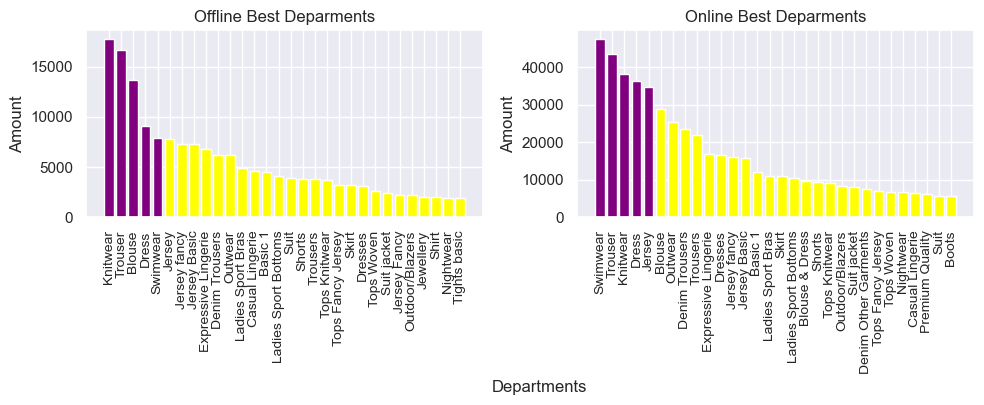

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
offline_colors = ['purple' if i<5 else 'yellow' for i in range(len(merge_df_ta_offline_short))]
online_colors = ['purple' if i<5 else 'yellow' for i in range(len(merge_df_ta_online_short))]

# Offline
axes[0].bar(merge_df_ta_offline_short['department_name'], merge_df_ta_offline_short['price'], color=offline_colors)
axes[0].set_title('Offline Best Deparments')
axes[0].set_ylabel('Amount')
axes[0].tick_params(axis='x', rotation=90, labelsize=10)
# Online
axes[1].bar(merge_df_ta_online_short['department_name'], merge_df_ta_online_short['price'], color=online_colors)
axes[1].set_title('Online Best Deparments')
axes[1].set_ylabel('Amount')
axes[1].tick_params(axis='x', rotation=90, labelsize=10)

fig.text(0.5, 0, 'Departments')
plt.tight_layout()
plt.show()

- 여성복에 대한 매출과 전체 매출의 추이를 비교하여 주 타겟층이 여성인지 판단
- 필요한 컬럼
    - articles : article_id, index_group_name
    - transactions : article_id, price, t_date, sales_channel_id

In [146]:
transaction_df = transactions[['t_dat', 'sales_channel_id', 'price', 'article_id']]
article_df = articles[['article_id', 'index_group_name']]

연도와 월로 날짜 변경

In [151]:
transaction_df['Year'] = pd.to_datetime(transaction_df['t_dat']).dt.year
transaction_df['Month'] = pd.to_datetime(transaction_df['t_dat']).dt.month

In [153]:
del transaction_df['t_dat']

In [156]:
transaction_df_month_group = transaction_df.groupby(['Year', 'Month'])['price'].sum().reset_index()
transaction_df_month_group.head()

,Year,Month,price
0,2018,9,17755.639593
1,2018,10,41584.816610
2,2018,11,39000.988390
3,2018,12,32532.514712
4,2019,1,33449.981475


In [160]:
transaction_df_month_group['Year-Month'] = transaction_df_month_group['Year'].astype(str) + '-' + transaction_df_month_group['Month'].astype(str).str.zfill(2)

In [162]:
del transaction_df_month_group['Year']
del transaction_df_month_group['Month']

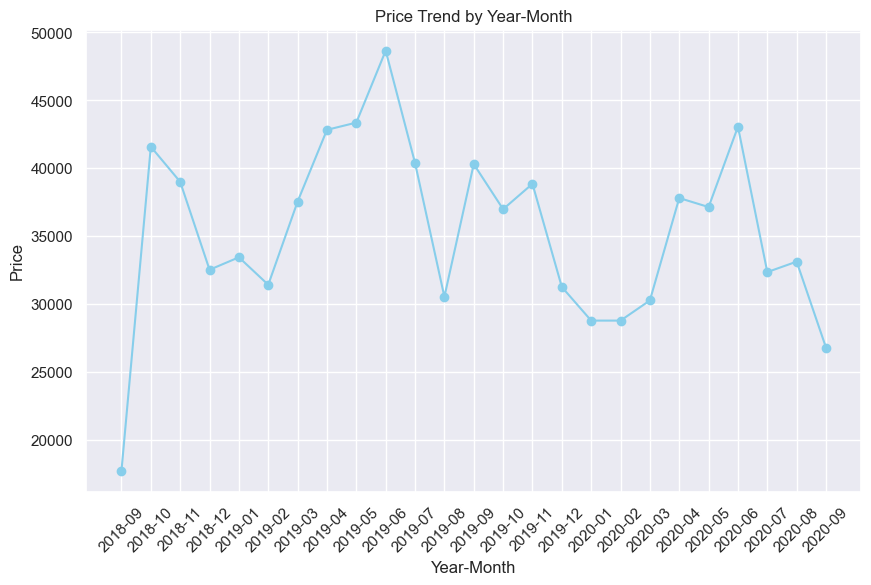

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(transaction_df_month_group['Year-Month'], transaction_df_month_group['price'], marker='o', linestyle='-', color='skyblue')

plt.title('Price Trend by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [189]:
merge_df_ta_index = pd.merge(transaction_df, article_df, on='article_id', how='left')

In [190]:
merge_df_ta_index.groupby('index_group_name')

In [192]:
merge_df_ta_index.head()

,sales_channel_id,price,article_id,Year,Month,index_group_name
0,2,0.050831,663713001,2018,9,Ladieswear
1,2,0.030492,541518023,2018,9,Ladieswear
2,2,0.015237,505221004,2018,9,Divided
3,2,0.016932,685687003,2018,9,Ladieswear
4,2,0.016932,685687004,2018,9,Ladieswear


In [191]:
merge_df_ta_index['Year'] = pd.to_datetime(merge_df_ta_index['t_dat']).dt.year
merge_df_ta_index['Month'] = pd.to_datetime(merge_df_ta_index['t_dat']).dt.month

KeyError: 't_dat'

In [185]:
del merge_df_ta_index['t_dat']

In [193]:
merge_df_ta_index_group = merge_df_ta_index.groupby(['Year', 'Month', 'index_group_name'])['price'].sum().reset_index()
merge_df_ta_index_group['Year-Month'] = merge_df_ta_index_group['Year'].astype(str) + '-' + merge_df_ta_index_group['Month'].astype(str).str.zfill(2)

In [194]:
del merge_df_ta_index_group['Year']
del merge_df_ta_index_group['Month']

In [213]:
merge_df_ta_index_group_date = merge_df_ta_index_group.groupby(['Year-Month', 'index_group_name'])['price'].sum().reset_index()
merge_df_ta_index_group_date.sort_values(by=['Year-Month', 'price'], ascending=[True, True], inplace=True)

In [228]:
# pivot table을 새로 만들어야 될 듯
pivot_group_date = pd.pivot_table(merge_df_ta_index_group_date, values='price', index='Year-Month', columns='index_group_name', aggfunc='sum', fill_value=0)

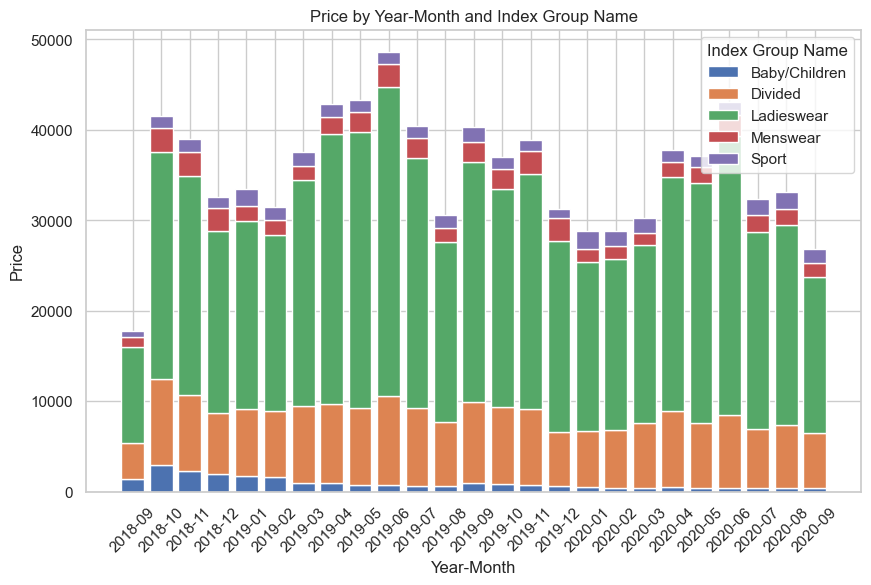

In [232]:
plt.figure(figsize=(10, 6))

bottom = np.zeros(len(pivot_group_date))
for col in pivot_group_date.columns:
    plt.bar(pivot_group_date.index, pivot_group_date[col], bottom=bottom, label=col)
    bottom += pivot_group_date[col].values

plt.title('Price by Year-Month and Index Group Name')
plt.xlabel('Year-Month')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Index Group Name')

plt.show()

In [173]:
# stacked bar chart로 index_group을 두고 / line 그래프와 합쳐서 한눈에 시각화 돕기

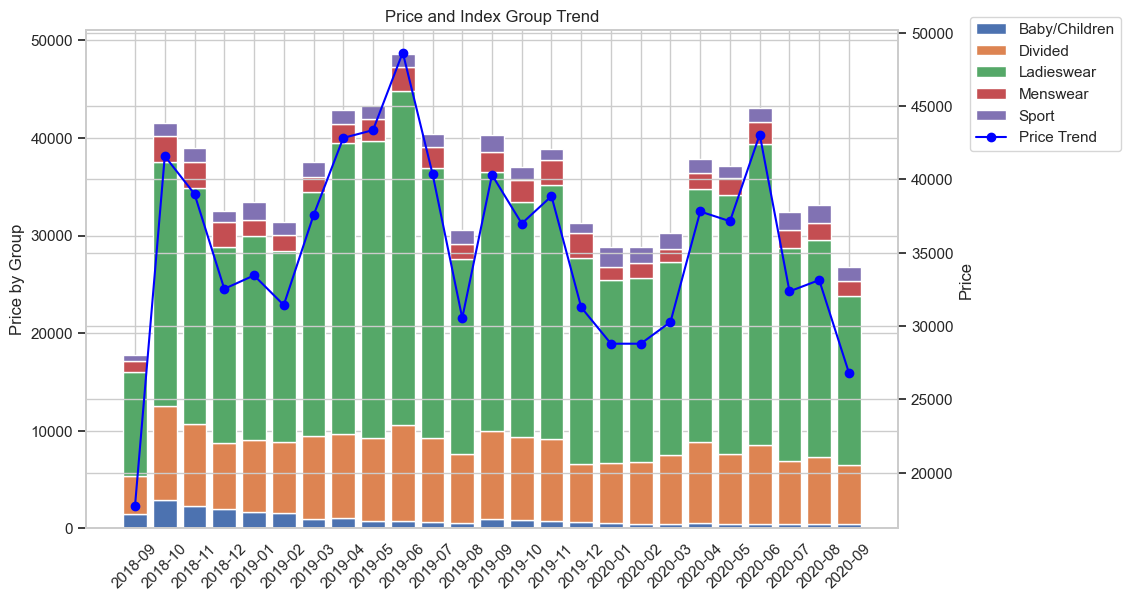

In [251]:
fig, ax1 = plt.subplots(figsize=(10, 6))

bottom = np.zeros(len(pivot_group_date))
for col in pivot_group_date.columns:
    ax1.bar(pivot_group_date.index, pivot_group_date[col], bottom=bottom, label=col)
    bottom += pivot_group_date[col].values
ax1.set_ylabel('Price by Group')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(transaction_df_month_group['Year-Month'], transaction_df_month_group['price'], 
         marker='o', linestyle='-', color='blue', label='Price Trend')
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Price')
ax2.tick_params(axis='y')

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.97, 1.0))
plt.title('Price and Index Group Trend')

plt.show()

# 가설 3번 분석

In [7]:
transactions['count'] = 1

In [8]:
transaction_group = transactions.groupby('article_id').sum().reset_index()

In [9]:
transaction_group.head()

,article_id,t_dat,customer_id,price,sales_channel_id,count
0,108775015,2018-09-202018-09-202018-09-202018-09-202018-0...,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,88.262881,19197,10841
1,108775044,2018-09-202018-09-202018-09-202018-09-202018-0...,66b048fec89b6a9e9e8088b4c5549008175c6cf2dedce5...,58.826169,12399,7250
2,108775051,2018-09-202018-09-202018-09-202018-09-202018-0...,187a5178f9e5e30cf0426b7a7f68dc609b667669e80e55...,1.070644,429,215
3,110065001,2018-09-202018-09-202018-09-202018-09-202018-0...,08f60b0c07fc14fffc8983aec045c80ede7a4197930463...,21.108746,1436,1044
4,110065002,2018-09-202018-09-202018-09-202018-09-212018-0...,334b9b10d01a6b65890e8572f5244c1c9c02a044b5fc91...,9.812746,892,539


In [10]:
del transaction_group['t_dat']
del transaction_group['customer_id']
del transaction_group['price']
del transaction_group['sales_channel_id']

In [11]:
article_df = articles[['article_id', 'colour_group_name', 'perceived_colour_master_name']]

In [12]:
article_df.head()

,article_id,colour_group_name,perceived_colour_master_name
0,108775015,Black,Black
1,108775044,White,White
2,108775051,Off White,White
3,110065001,Black,Black
4,110065002,White,White


In [13]:
article_df_category = article_df.copy()
article_df_category.loc[article_df['colour_group_name'] == article_df['perceived_colour_master_name'], 'is_same'] = 1
article_df_category.loc[article_df['colour_group_name'] != article_df['perceived_colour_master_name'], 'is_same'] = 0

In [14]:
article_df_category['is_same'] = article_df_category['is_same'].astype(int)

In [15]:
merged_df_ta = pd.merge(article_df_category, transaction_group, on='article_id')

In [16]:
merged_df_ta

,article_id,colour_group_name,perceived_colour_master_name,is_same,count
0,108775015,Black,Black,1,10841
1,108775044,White,White,1,7250
2,108775051,Off White,White,0,215
3,110065001,Black,Black,1,1044
4,110065002,White,White,1,539
...,...,...,...,...,...
104542,952267001,Black,Black,1,41
104543,952938001,Beige,Mole,0,9
104544,953450001,Black,Black,1,17
104545,953763001,Black,Black,1,35


In [17]:
merged_df_ta_info = merged_df_ta[['is_same', 'count']]

### 분석 진행 전 기술적 통계 분석

In [18]:
merged_df_ta_info['count'].describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: count, dtype: float64

In [19]:
different_group = merged_df_ta_info[merged_df_ta_info['is_same'] == 0]
same_group = merged_df_ta_info[merged_df_ta_info['is_same'] == 1]

### 단순회귀분석 진행

In [21]:
import statsmodels.api as sm

x = merged_df_ta_info['is_same']  # 독립 변수
x = sm.add_constant(x)  # 상수항 추가
y = merged_df_ta_info['count']

model = sm.OLS(y, x).fit(cov_type='HC3')
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     835.2
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          6.38e-183
Time:                        22:54:40   Log-Likelihood:            -8.4561e+05
No. Observations:              104547   AIC:                         1.691e+06
Df Residuals:                  104545   BIC:                         1.691e+06
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        235.6822      2.339    100.745      0.0

### 종속변수가 0이상의 정수이고, 왜도가 크기 때문에 포아송 회귀분석을 진행

In [22]:
merged_df_ta_info['intercept'] = 1

# 모델 적합
model = sm.GLM(merged_df_ta_info['count'], merged_df_ta_info[['intercept', 'is_same']], family=sm.families.Poisson()).fit(cov_type='HC3')

# 결과 출력
print(model.summary())

/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_5593/3018278565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_ta_info['intercept'] = 1


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:               104547
Model:                            GLM   Df Residuals:                   104545
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.8236e+07
Date:                Sat, 13 Apr 2024   Deviance:                   7.5851e+07
Time:                        22:54:40   Pearson chi2:                 1.97e+08
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.4625      0.010    550.328      0.0

### 음이항 회귀 사용해보기

In [24]:
model = sm.GLM(merged_df_ta_info['count'], sm.add_constant(merged_df_ta_info['is_same']), family=sm.families.NegativeBinomial()).fit(cov_type='HC3')
print(model.summary())

/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:               104547
Model:                            GLM   Df Residuals:                   104545
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.9943e+05
Date:                Sat, 13 Apr 2024   Deviance:                   3.2662e+05
Time:                        23:05:49   Pearson chi2:                 6.32e+05
No. Iterations:                     7   Pseudo R-squ. (CS):            0.05597
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4625      0.010    550.328      0.0